# Decision Tree

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<hr>

### 1.a. Decision Tree Binary Classification (Perfect Case)

In [32]:
df = pd.DataFrame({
    'sarjana': [0, 0, 0, 1, 1, 1],
    'wage>50': [0, 0, 0, 1, 1, 1]
})
df

,sarjana,wage>50
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1


### Using Sklearn

In [39]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(df[['sarjana']], df['wage>50'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

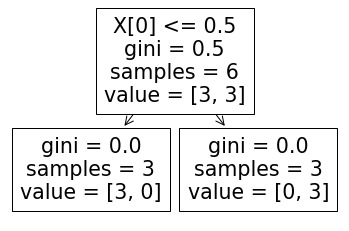

In [40]:
tree.plot_tree(model.fit(df[['sarjana']], df['wage>50'])) 

In [41]:
tree.export_graphviz(
    model.fit(df[['sarjana']], df['wage>50']), 
    out_file='15.0.dot',
    feature_names=['sarjana'],
    class_names=['>50++', '<50--']
)
# go to https://dreampuf.github.io/GraphvizOnline 
# to convert the .dot to .png/.svg/image!

![tree](./15.01a.png)

<hr>

### 1.b. Decision Tree Binary Classification (Not so Perfect Case)

In [42]:
df = pd.DataFrame({
    'sarjana': [0, 0, 0, 1, 1, 1],
    'wage>50': [0, 0, 1, 0, 1, 1]
})
df

,sarjana,wage>50
0,0,0
1,0,0
2,0,1
3,1,0
4,1,1
5,1,1


<hr>

## Gini Impurity

In [43]:
print(1 - ((1/3)**2) - ((2/3)**2))
print((1/2) * 0.4444 + (1/2) * 0.4444 )

0.4444444444444444
0.4444


<hr>

## Gain & Entropy

In [56]:
entropySarjana0 = -1 * (2/3) * np.log2(2/3)
entropySarjana1 = -1 * (2/3) * np.log2(2/3)
entropySarjana = entropySarjana0 + entropySarjana1
gainSarjana = (3/6)*entropySarjana0 + (3/6)*entropySarjana1

entropySarjana0, entropySarjana1, entropySarjana, gainSarjana

(0.38997500048077083,
 0.38997500048077083,
 0.7799500009615417,
 0.38997500048077083)

<hr>

## Decision Tree Sklearn

### 1. Gini Criterion

In [45]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(df[['sarjana']], df['wage>50'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(83.7, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

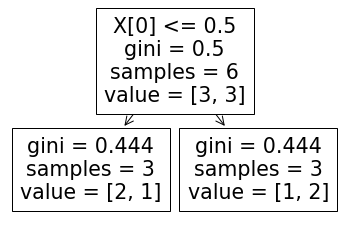

In [46]:
tree.plot_tree(model.fit(df[['sarjana']], df['wage>50'])) 

In [25]:
tree.export_graphviz(
    model.fit(df[['sarjana']], df['wage>50']), 
    out_file='15.01b.dot',
    feature_names=['sarjana'],
    class_names=['>50++', '<50--']
)

![tree](./15.01b.png)

<hr>

### 2. Entropy Criterion

In [47]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(df[['sarjana']], df['wage>50'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]')]

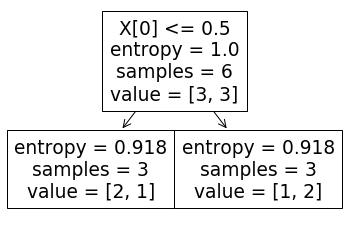

In [48]:
tree.plot_tree(model.fit(df[['sarjana']], df['wage>50'])) 

<hr>

### 2. Decision Tree Binary Classification, Multiple Features

In [26]:
df = pd.DataFrame([
    {'sarjana': 1, 'sehat':1, 'supel':1, 'wage>50jt':1},
    {'sarjana': 1, 'sehat':0, 'supel':0, 'wage>50jt':1},
    {'sarjana': 0, 'sehat':1, 'supel':1, 'wage>50jt':0},
    {'sarjana': 0, 'sehat':0, 'supel':1, 'wage>50jt':0},
    {'sarjana': 0, 'sehat':0, 'supel':1, 'wage>50jt':0}
])
df

,sarjana,sehat,supel,wage>50jt
0,1,1,1,1
1,1,0,0,1
2,0,1,1,0
3,0,0,1,0
4,0,0,1,0


- Dari dataset di atas, apakah seorang karyawan memiliki salary>50jt tidak dapat ditentukan hanya dengan melihat sarjana saja, supel saja atau sehat saja. Untuk menentukan bagaimana bentuk decision tree-nya, kita harus menghitung & membandingkan __impurity__ tiap feature. Salah satu cara menentukan impurity dengan menghitung __gini impurity__.

- Gini impurity = $ \displaystyle 1 - $ probability YES $^2 - $ probability NO$^2$

- Dari perhitungan gini impurity tiap feature, didapati bahwa:
    - Gini Sarjana = 0
    - Gini Sehat = 0.473
    - Gini Supel = 0.4782
    
    
- Makin rendah gini, maka featurenya dapat mengklasifikasikan dengan semakin baik. Sehingga feature dengan gini terendah dapat digunakan sebagai node root suatu decision tree.

In [27]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(df[['sarjana', 'sehat', 'supel']], df['wage>50jt'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
tree.export_graphviz(
    model.fit(df[['sarjana', 'sehat', 'supel']], df['wage>50jt']), 
    out_file='15.02.dot',
    feature_names=['sarjana', 'sehat', 'supel'],
    class_names=['>50++', '<50--']
)

![tree](./15.02.png)